# 3o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : 1

In [ ]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate

## 1. Derivada de sinais 1D

### Estude os códigos abaixo

Vamos primeiro definir uma função f(x)=x**2, chamada fx

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


Text(0, 0.5, '$f(x)=x^2$')

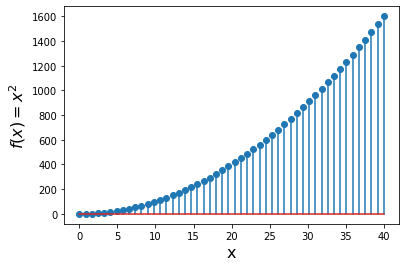

In [ ]:
#
# Definição do eixo x
# 50 amostras entre 0 e 40
#
x = np.linspace(0, 40, 50)

#
# Obtendo os valores da função f(x)
#
fx = x**2

#
# Desenha o gráfico e insere labels
#
plt.stem(x, fx)
plt.xlabel('x', size=16)
plt.ylabel('$f(x)=x^2$', size=16)

#### Cálculo da derivada de fx:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


Text(0, 0.5, '$\\Delta f/\\Delta x\\approx 2x$')

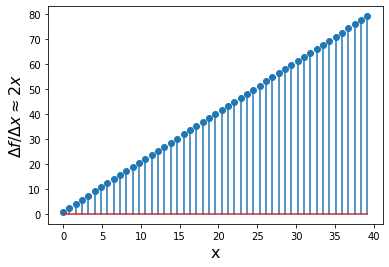

In [ ]:
#
# A derivada de 1a ordem do sinal pode ser calculada por diferenças
# como indicado no código comentado abaixo
#
dx = x[1]-x[0]
dfx = np.zeros(len(fx)-1)
for i in range(len(fx)-1):
    dfx[i] = (fx[i+1] - fx[i])/dx
   
#
# Desenha o gráfico e insere labels
#
plt.stem(x[:-1], dfx)
plt.xlabel('x', size=16)
plt.ylabel(r'$\Delta f/\Delta x\approx 2x$', size=16)

# PROBLEMA 1

## Parte A 

Reescreva o código acima substituindo o cálculo da "derivada por diferenças" usado um "filtro derivativo" e a operação de convolução ou correlação cruzada

In [ ]:
#
# Definir o filtro derivativo de 1a ordem de 2 elementos
#
filtro = np.array([-1, 1]) / dx

#
# Usar o método "numpy.correlate(a, v, mode='valid')" ou "numpy.convolve(a, v, mode='full')"
# para realizar a filtragem do sinal
#

dfx_filtro = np.correlate(fx, filtro, mode='valid')

print('As derivadas são iguais?')
print(np.all( np.abs(dfx - dfx_filtro) < 1e-10 )) # usando um epsilon bem pequeno

As derivadas são iguais?
True


## Parte B

Usando o método numpy.correlate(a, v, mode='valid') determine a derivada de 1a ordem da função seno definida no intervalo de 0 a $4\pi$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


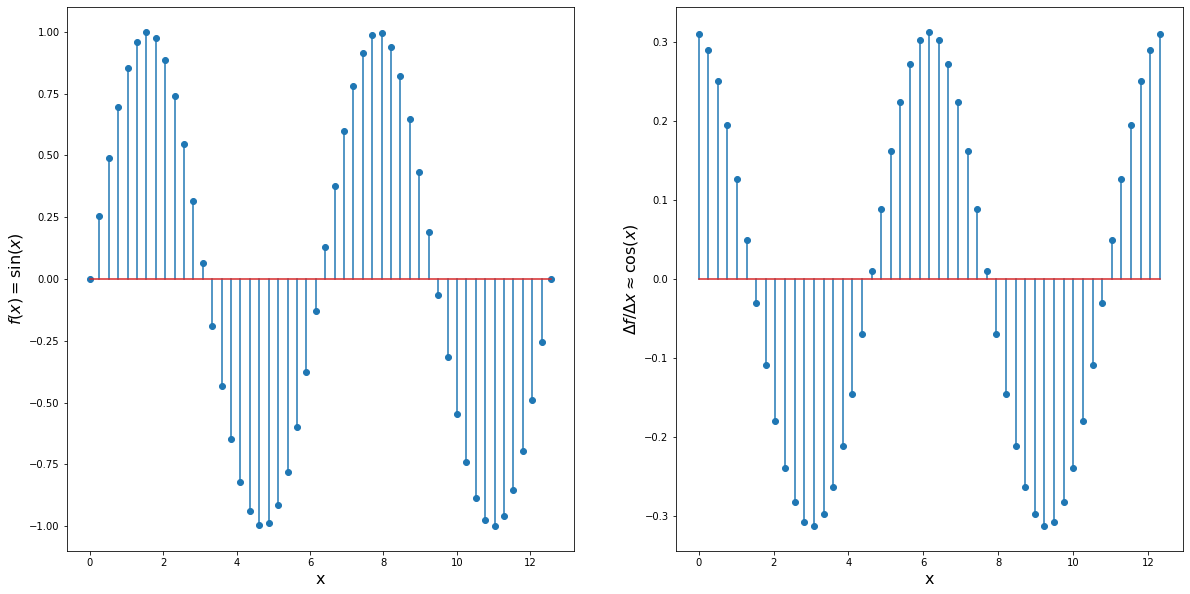

In [ ]:
#
# Defina o eixo x no intervalo indicado acima com um total de N=50 amostras
#
x = np.linspace(0, 4 * np.pi, 50)

#
# Defina a função seno -> use a função np.sin() 
#
senx = np.sin(x)

#
# Derivada da função seno 
#
dx = x[1] - x[0]
dsenx = np.correlate(senx, filtro, mode='valid')

#
# Plotar usando "subplot" as funções seno e sua derivada
#
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].stem(x, senx)
axs[0].set_xlabel('x', size=16)
axs[0].set_ylabel('$f(x)=\sin(x)$', size=16)

axs[1].stem(x[:-1], dsenx)
axs[1].set_xlabel('x', size=16)
axs[1].set_ylabel(r'$\Delta f/\Delta x\approx \cos(x)$', size=16)

plt.show()

## Parte C

Repita o experimento acima mas agora adicionando ruído à função f(x). Para isso, utilize o seguinte trecho de código após a determinação dos valores de f(x).

In [ ]:
mu = 0.0                               # média zero
sigma = 0.3                            # desvio padrão 0.3
N = 50                                 # número de amostras igual a 50
noise = np.random.normal(mu, sigma, N) # ruído a ser inserido ao sinal
senx_noise = senx + noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


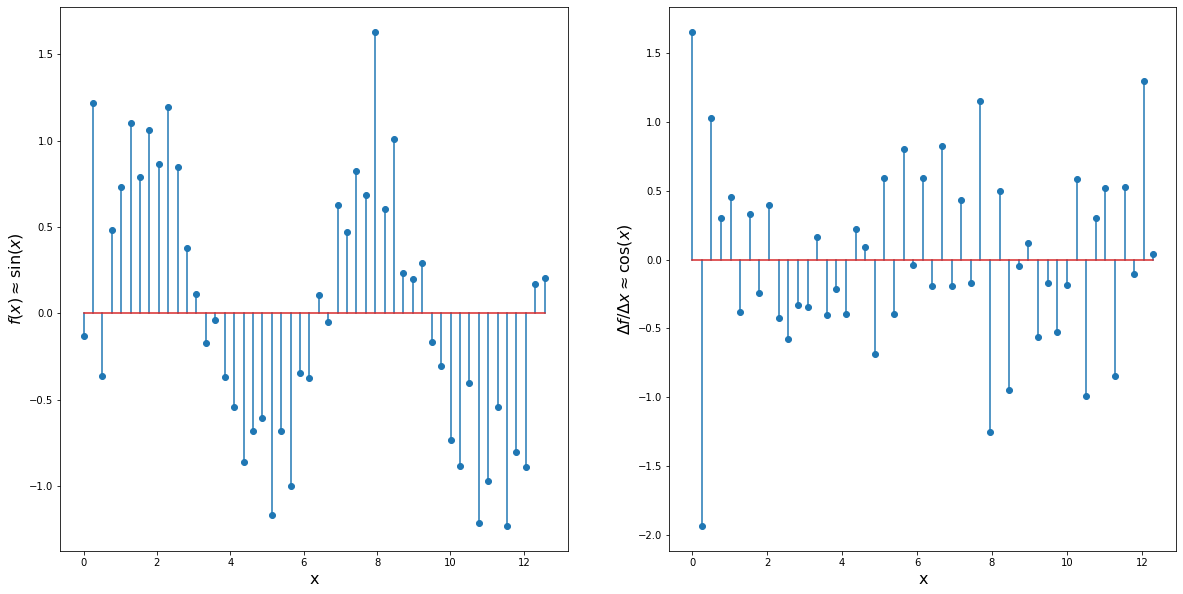

In [ ]:
dsenx_noise = np.correlate(senx_noise, filtro, mode='valid')

#
# Plotar usando "subplot" as funções seno e sua derivada
#
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].stem(x, senx_noise)
axs[0].set_xlabel('x', size=16)
axs[0].set_ylabel(r'$f(x)\approx\sin(x)$', size=16)

axs[1].stem(x[:-1], dsenx_noise)
axs[1].set_xlabel('x', size=16)
axs[1].set_ylabel(r'$\Delta f/\Delta x\approx \cos(x)$', size=16)

plt.show()

## Parte D

Construa usando o filtro gaussiano 1D dado abaixo, realize a convolução do filtro com o sinal fx_noise (fx + noise). A seguir plote usando "subplot" os sinais antes e depois da convolução.

OBS: O valor do parâmetro "S" do filtro representa o tamanho do filtro - use um valor ímpar: S=25, por exemplo. 

In [ ]:
#
# Filtro Gaussiano 1D
#
#
def filtro_gaussiano_1d(S):
    sigma = S/(2*3)
    x = np.linspace(-3*sigma, 3*sigma, S)
    y = np.exp(-x**2/(2*sigma**2))
    y = y/np.sum(y)
    
    return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


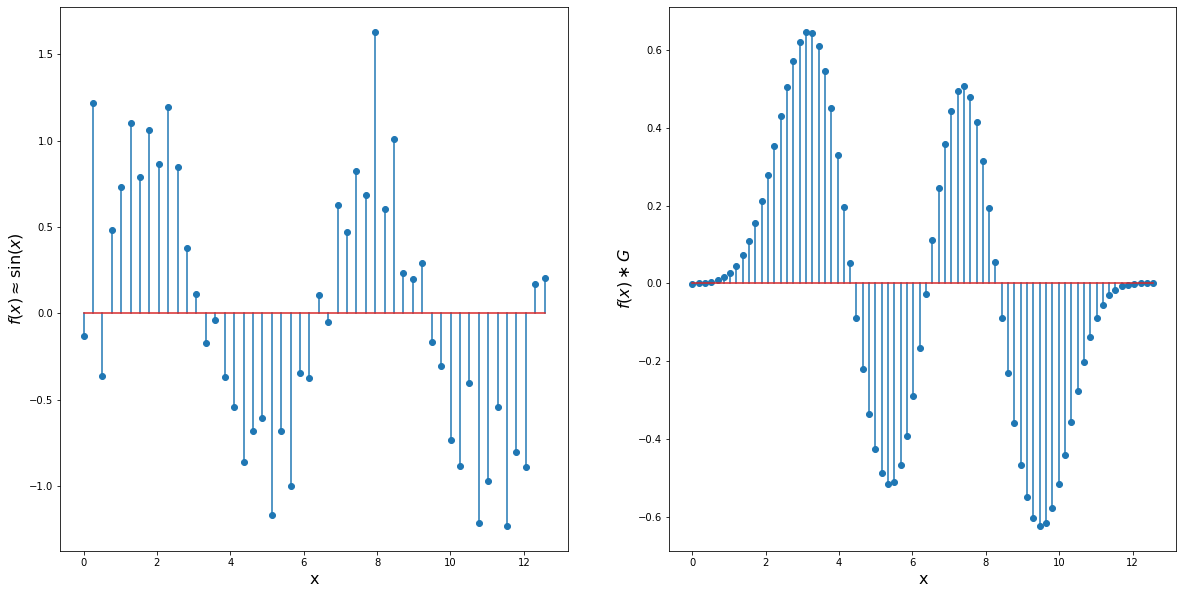

In [ ]:
S_filtro = 25

filtro_gaussiano = filtro_gaussiano_1d(S_filtro)
senx_filtrada = np.convolve(senx_noise, filtro_gaussiano, mode='full')

fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].stem(x, senx_noise)
axs[0].set_xlabel('x', size=16)
axs[0].set_ylabel(r'$f(x)\approx\sin(x)$', size=16)

x_filtrado = np.linspace(0, 4 * np.pi, 50 + S_filtro - 1)
axs[1].stem(x_filtrado, senx_filtrada)
axs[1].set_xlabel('x', size=16)
axs[1].set_ylabel(r'$f(x) \ast G $', size=16)

plt.show()

## 2. Derivada de imagens

### Estude o código abaixo

### A. Calculando diretamente as diferenças entre pixels adjacentes

Text(0.5, 1.0, 'Derivada em y')

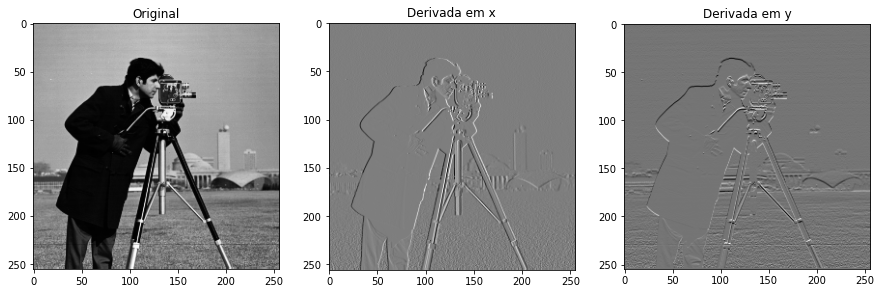

In [ ]:
img = plt.imread('cameraman.tiff')
img = img.astype(int)               # Converte imagem de uint (unsigned int) para int (signed int), pois
                                    # a derivada pode ser negativa
num_rows, num_cols = img.shape

# Derivada na direção x, a imagem resultante possui uma coluna a menos que a original
img_dx = np.zeros((num_rows, num_cols-1))    
for row in range(num_rows):
    for col in range(num_cols-1):
        img_dx[row, col] = img[row,col+1] - img[row,col]
# O loop aninhado acima poderia ser substituído por
# img_dx = img[:,1:] - img[:,:-1]
# ou por
# img_dx = np.diff(img, axis=1)

# Derivada na direção y, a imagem resultante possui uma linha a menos que a original
img_dy = np.zeros((num_rows-1, num_cols))
for col in range(num_cols):
    for row in range(num_rows-1):
        img_dy[row, col] = img[row+1,col] - img[row,col]
# O loop aninhado acima poderia ser substituído por
# img_dy = img[1:] - img[:-1]
# ou por
# img_dy = np.diff(img, axis=0)
        
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy, 'gray')
plt.title('Derivada em y')

Note que a derivada possui tantos valores negativos quantos positivos. Portanto, na visualização acima o valor mais negativo da imagem é mapeado para a cor preta, e o valor mais positivo para a cor branca. Com isso, pixels possuindo derivada zero (regiões uniformes da imagem, como o céu) são mapeados para uma cor intermediária, o cinza. 

#### Histograma das imagens:

Text(0.5, 1.0, 'Derivada em y')

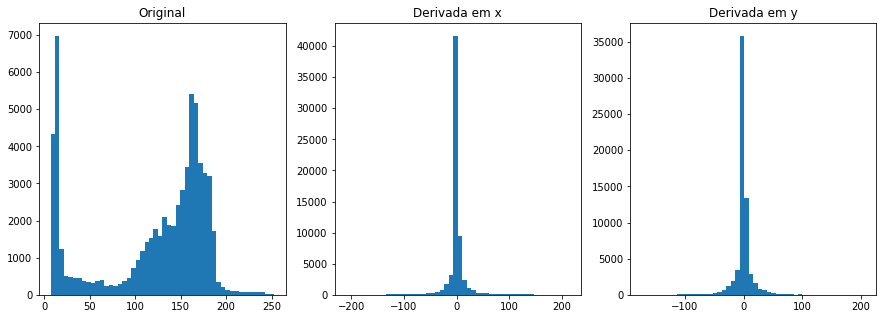

In [ ]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.hist(img.flatten(), 50)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.hist(img_dx.flatten(), 50)
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.hist(img_dy.flatten(), 50)
plt.title('Derivada em y')

#### Magnitude do gradiente

Text(0.5, 1.0, 'Magnitude do gradiente')

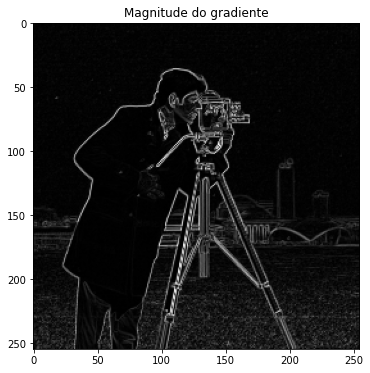

In [ ]:
img_grad_mag = np.zeros((num_rows-1, num_cols-1))
for col in range(num_cols-1):
    for row in range(num_rows-1):
        img_grad_mag[row, col] = np.sqrt(img_dx[row,col]**2+img_dy[row, col]**2)
# Utilizando o numpy, o loop aninhado acima pode ser substituído por
#img_grad_mag = np.sqrt(img_dx[:-1]**2+img_dy[:, :-1]**2)
# Os índices :-1 acima são necessários porque os arrays possuem tamanhos diferentes

plt.figure(figsize=[6,6])
plt.imshow(img_grad_mag, 'gray')
plt.title('Magnitude do gradiente')

# PROBLEMA 2

## Parte A 

Reescrever o código acima substituindo o cálculo da derivada por diferenças usado um filtro derivativo simples e a operação de convolução

### Derivada utilizando convolução e o filtro derivada simples

Text(0.5, 1.0, 'Derivada em y')

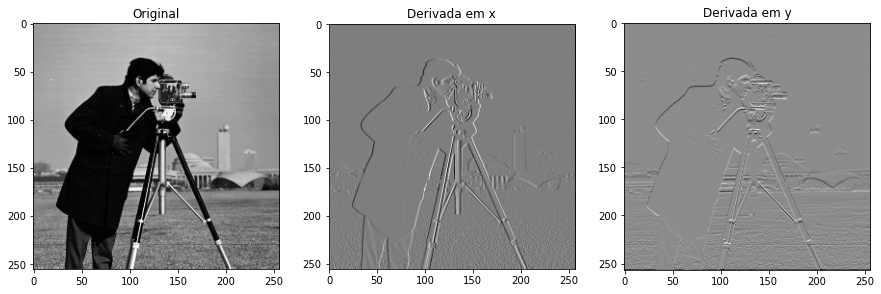

In [ ]:
from scipy.signal import convolve

#
# Filtros derivada
#
wx = np.array([[1,  -1]])
wy = np.array([[1],[-1]])

img_dx_conv = convolve(img, wx, mode='full')
img_dy_conv = convolve(img, wy, mode='full')

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv, 'gray')
plt.title('Derivada em y')

## Parte B

### Derivada utilizando convolução com o filtro de Sobel

Text(0.5, 1.0, 'Derivada em y')

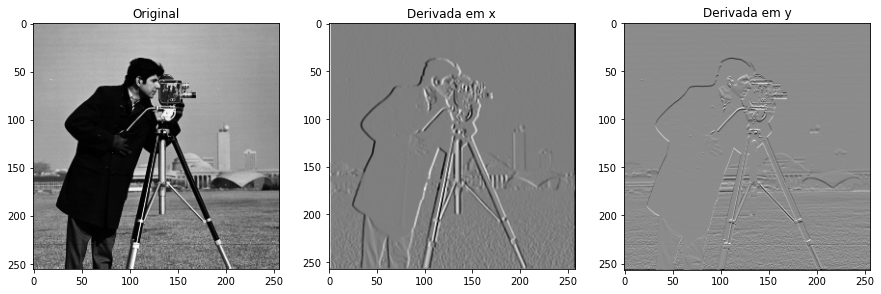

In [ ]:
# Filtros derivada
sx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])
sy = wx.transpose()

img_dx_conv_sobel = convolve(img, sx, mode='full')
img_dy_conv_sobel = convolve(img, sy, mode='full')

plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(img_dx_conv_sobel, 'gray')
plt.title('Derivada em x')
plt.subplot(1, 3, 3)
plt.imshow(img_dy_conv_sobel, 'gray')
plt.title('Derivada em y')

### Estudar o código abaixo 
#### Comparação da magnitude do gradiente entre derivada simples e filtro Sobel

Text(0.5, 1.0, 'Derivada Sobel')

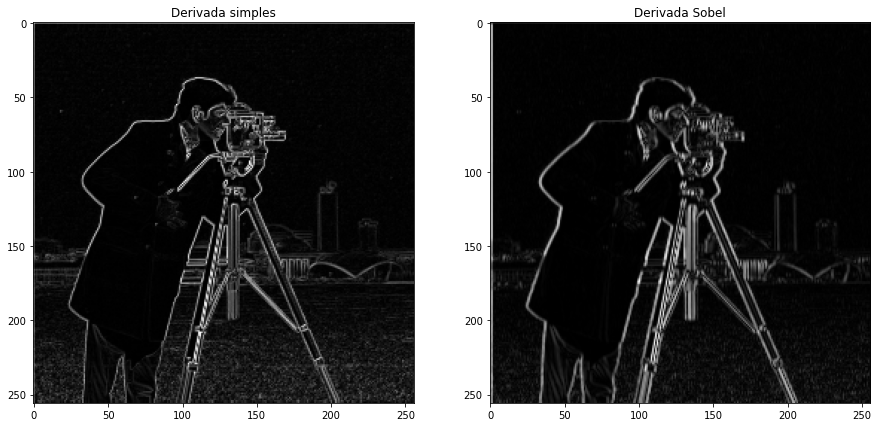

In [ ]:
img_grad_mag = np.sqrt(img_dx_conv[:256,:256]**2 + img_dy_conv[:256,:256]**2)
img_grad_mag_sobel = np.sqrt(img_dx_conv_sobel[:256,:256]**2 + img_dy_conv_sobel[:256,:256]**2)
# Corrigimos o tamanho das imagens pois a diferença nos tamanhos
# dos filtros fazia com que as imagens tivessem pixels a mais
plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
plt.imshow(img_grad_mag, 'gray')
plt.title('Derivada simples')
plt.subplot(1, 2, 2)
plt.imshow(img_grad_mag_sobel, 'gray')
plt.title('Derivada Sobel')


### Estudar o código abaixo 
#### Visualização do gradiente em uma dada região da imagem

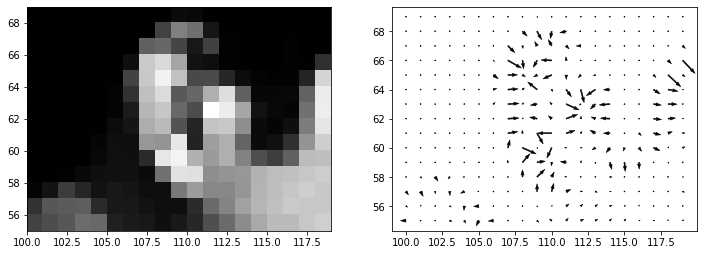

In [ ]:
def view_gradient(img, img_dx, img_dy, region):
    
    Y, X = np.mgrid[region[0]:region[1], region[2]:region[3]]
    Y = Y[::-1]
    img_region = img[region[0]:region[1], region[2]:region[3]]
    img_dx_region = img_dx[region[0]:region[1], region[2]:region[3]]
    img_dy_region = img_dy[region[0]:region[1], region[2]:region[3]]
    
    plt.figure(figsize=[12, 6])
    plt.subplot(1, 2, 1, aspect='equal')
    plt.pcolormesh(X, Y, img_region, cmap='gray')
    plt.subplot(1, 2, 2, aspect='equal')
    plt.quiver(X, Y, img_dx_region, -img_dy_region, edgecolor='k', facecolor='k', 
               linewidth=.5, scale=3e3)

region = [55,70,100,120]    # [first row, last row, first column, last column]
view_gradient(img, img_dx_conv, img_dy_conv, region)